# Bài kiểm tra cuối môn: LDS3 
### Cho dữ liệu housing-prices-dataset/train.csv
### Yêu cầu: Thực hiện các công việc sau
1. Xác định các thuộc tính
2. Phân tích đơn biến  
   Để dự đoán giá nhà, giả sử cần các thông tin sau: 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 
   'TotRmsAbvGrd' => phân tích các biến này
3. Phân tích hai biến
4. Xử lý dữ liệu thiếu
5. Phát hiện và xử lý ngoại lệ

In [38]:
# link: https://www.kaggle.com/alphaepsilon/housing-prices-dataset

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [40]:
df = pd.read_csv("housing-prices-dataset/train.csv")
df.shape

(1460, 81)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 1. Xác định các thuộc tính
1. Input: Tất cả ngoại trừ SalePrice
2. Output: SalePrice
3. Type of variable: <br/>
    3.1 Predictor: khác SalePrice <br/>
    3.2 Target: SalePrice <br/>
4. Data Type: <br/>
    4.1 Charactor/String <br/>
    4.2 Numeric <br/>
5. Variable Category:<br/>
    5.1 Categorical: kieu so, kieu chuoi  <br/>
    5.2 Continuous: int, float

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [43]:
#Tạo danh sách các cột kiểu số 
numbers = [f for f in df.columns if df.dtypes[f] != 'object'] # Quantitative: # du lieu kieu so
list_nums = ', '.join(numbers)
list_nums

'Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice'

In [44]:
# Tạo danh sách cột kiểu chuỗi
objects = [f for f in df.columns if df.dtypes[f] == 'object'] # Qualitative : # du lieu kieu chuoi
list_obj = ', '.join(objects)
list_obj

'MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition'

In [45]:
# Categorical: 
# Duyệt qua các biến chuỗi, in ra các giá trị có trong mỗi biến -->  xem xet cac bien phan loai kieu chuoi
# Với kết quả in ra, xác định các biến kiểu số thuộc loại Categorical 
i = 1
for obj in objects:
    print(i, "/", obj, "\t",len(df[obj].unique()),":", df[obj].unique())
    i = i+1

1 / MSZoning 	 5 : ['RL' 'RM' 'C (all)' 'FV' 'RH']
2 / Street 	 2 : ['Pave' 'Grvl']
3 / Alley 	 3 : [nan 'Grvl' 'Pave']
4 / LotShape 	 4 : ['Reg' 'IR1' 'IR2' 'IR3']
5 / LandContour 	 4 : ['Lvl' 'Bnk' 'Low' 'HLS']
6 / Utilities 	 2 : ['AllPub' 'NoSeWa']
7 / LotConfig 	 5 : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
8 / LandSlope 	 3 : ['Gtl' 'Mod' 'Sev']
9 / Neighborhood 	 25 : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
10 / Condition1 	 9 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
11 / Condition2 	 8 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
12 / BldgType 	 5 : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
13 / HouseStyle 	 8 : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
14 / RoofStyle 	 6 : ['Gable' 'Hip' 'Gambrel

In [46]:
# Duyệt qua các biến kiểu số in ra các giá trị phân biệt có trong cột (chỉ in các giá trị khi số giá trị phân biệt nhỏ hơn 120)
# Với kết quả in ra, xác định các biến kiểu số thuộc loại Categorical 
i = 1
for obj in numbers:
    print(i, "/", obj, "\t",len(df[obj].unique()),":", df[obj].unique() if len(df[obj].unique())<120 else '')
    i = i+1

1 / Id 	 1460 : 
2 / MSSubClass 	 15 : [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
3 / LotFrontage 	 111 : [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
4 / LotArea 	 1073 : 
5 / OverallQual 	 10 : [ 7  6  8  5  9  4 10  3  1  2]
6 / OverallCond 	 9 : [5 8 6 7 4 2 3 9 1]
7 / YearBuilt 	 112 : [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 19

In [47]:
#- Quan sát 2 kết quả trên để kết luận, xác định tập features. Trong phần tiếp theo giả sử chúng ta chỉ làm việc với các 
features = 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd'   

## 2. Phân tích đơn biến

In [48]:
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

### 2.1. Với mỗi biến continuous. Hãy thực hiện các yêu cầu sau: 
- Vẽ đồ thị gồm 2 phần: histogram và boxplot của biến.
- Tìm mean, mode, độ nghiêng, độ nhọn  --> Nhận xét có phân phối chuẩn không.
- Nếu không phải phân phối chuẩn: xác định Q1, Q3, IQR, Oulier Upper, Outlier Lower
  Nếu là phân phối chuẩn: xác định Oulier Upper, Outlier Lower theo Z-score
- Xác định tập dữ  outlier trên và dưới. 
- Kiểm tra nếu tổng số các outlier nhỏ hơn 5% số phần tử tổng thể thì -->  xóa các outlier này khỏi tập dữ liệu. 
#### Danh sách các biến Continuous cần thực hiện
- LotArea
- 1stFlrSF
- 2ndFlrS

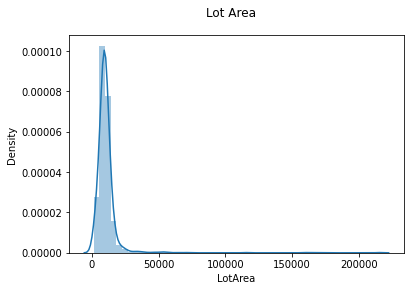

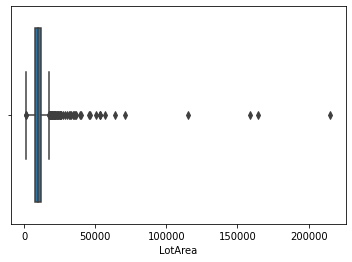

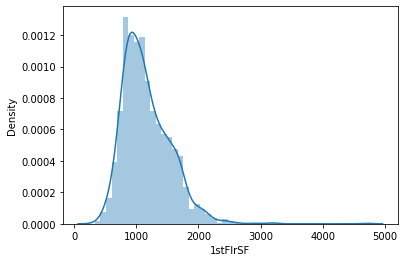

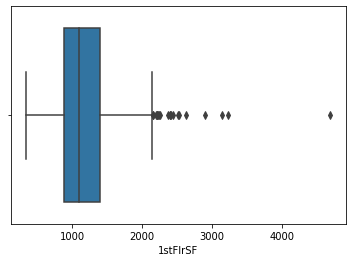

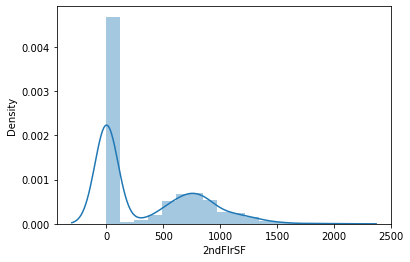

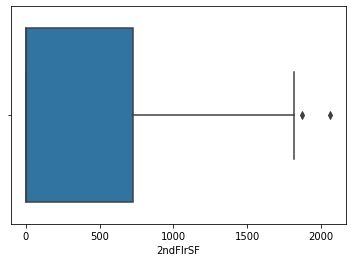

In [49]:
# Vẽ đồ thị gồm 2 phần: histogram và boxplot của biến.
lot_area = df['LotArea']
first_flr_sf = df['1stFlrSF']
second_flr_sf = df['2ndFlrSF']

fig, ax = plt.subplots()
# Lot Area
fig.suptitle('Lot Area')
sns.distplot(lot_area)
plt.show()
sns.boxplot(lot_area)
plt.show()

# 1st Flr SF
fig.suptitle('1st Flr SF')
sns.distplot(first_flr_sf)
plt.show()
sns.boxplot(first_flr_sf)
plt.show()

# 2nd Flr SF
fig.suptitle('2nd Flr SF')
sns.distplot(second_flr_sf)
plt.show()
sns.boxplot(second_flr_sf)
plt.show()

In [50]:
#Tìm mean, mode, độ nghiêng, độ nhọn --> Nhận xét có phân phối chuẩn không.
lot_area_mode = lot_area.mode()
print('lot_area_mode', lot_area_mode)
lot_area_mean = lot_area.mean()
print('lot_area_mean', lot_area_mean)
lot_area_median = lot_area.median()
print('lot_area_median', lot_area_median)
lot_area_skewness = lot_area.skew()
print('lot_area_skewness', lot_area_skewness)
lot_area_kurtosis = lot_area.kurtosis()
print('lot_area_kurtosis', lot_area_kurtosis)
print('mode, median và mean tương đương nhau => phân phối chuẩn và skewness > 0, phân phối lệch phải. Kurtosis > 0, đây là phân phối nhọn hơn phân phối chuẩn.\n')

first_flr_sf_mode = first_flr_sf.mode()
print('first_flr_sf_mode', first_flr_sf_mode)
first_flr_sf_mean = first_flr_sf.mean()
print('first_flr_sf_mean', first_flr_sf_mean)
first_flr_sf_median = first_flr_sf.median()
print('first_flr_sf_median', first_flr_sf_median)
first_flr_sf_skewness = first_flr_sf.skew()
print('first_flr_sf_skewness', first_flr_sf_skewness)
first_flr_sf_kurtosis = first_flr_sf.kurtosis()
print('first_flr_sf_kurtosis', first_flr_sf_kurtosis)
print('median, mean và mode tương đương nhay => phân phối chuẩn và skewness > 0, phân phối lệch phải. Kurtosis > 0, đây là phân phối nhọn hơn phân phối chuẩn.\n')

second_flr_sf_mode = second_flr_sf.mode()
print('second_flr_sf_mode', second_flr_sf_mode)
second_flr_sf_mean = second_flr_sf.mean()
print('second_flr_sf_mean', second_flr_sf_mean)
second_flr_sf_median = second_flr_sf.median()
print('second_flr_sf_median', second_flr_sf_median)
second_flr_sf_skewness = second_flr_sf.skew()
print('second_flr_sf_skewness', second_flr_sf_skewness)
second_flr_sf_kurtosis = second_flr_sf.kurtosis()
print('second_flr_sf_kurtosis', second_flr_sf_kurtosis)
print('median # mean # mode => đây không phải là phân phối chuẩn và skewness > 0, phân phối lệch phải. Kurtosis < 0, đây là phân phối thấp hơn phân phối chuẩn.\n')

lot_area_mode 0    7200
dtype: int64
lot_area_mean 10516.828082191782
lot_area_median 9478.5
lot_area_skewness 12.207687851233496
lot_area_kurtosis 203.24327101886033
mode, median và mean tương đương nhau => phân phối chuẩn và skewness > 0, phân phối lệch phải. Kurtosis > 0, đây là phân phối nhọn hơn phân phối chuẩn.

first_flr_sf_mode 0    864
dtype: int64
first_flr_sf_mean 1162.626712328767
first_flr_sf_median 1087.0
first_flr_sf_skewness 1.3767566220336365
first_flr_sf_kurtosis 5.74584148244079
median, mean và mode tương đương nhay => phân phối chuẩn và skewness > 0, phân phối lệch phải. Kurtosis > 0, đây là phân phối nhọn hơn phân phối chuẩn.

second_flr_sf_mode 0    0
dtype: int64
second_flr_sf_mean 346.99246575342465
second_flr_sf_median 0.0
second_flr_sf_skewness 0.8130298163023265
second_flr_sf_kurtosis -0.5534635576075795
median # mean # mode => đây không phải là phân phối chuẩn và skewness > 0, phân phối lệch phải. Kurtosis < 0, đây là phân phối thấp hơn phân phối chuẩn.



In [51]:
# Nếu không phải phân phối chuẩn: xác định Q1, Q3, IQR, Oulier Upper, Outlier Lower Nếu là phân phối chuẩn: xác định Oulier Upper, Outlier Lower theo Z-score

# Đối với không phải phân phối chuẩn: 2ndFlrSF
second_flr_sf_Q1 = np.percentile(second_flr_sf, 25, interpolation = 'midpoint')
print('second_flr_sf_Q1', second_flr_sf_Q1)
second_flr_sf_Q3 = np.percentile(second_flr_sf, 75, interpolation = 'midpoint')
print('second_flr_sf_Q3', second_flr_sf_Q3)
second_flr_sf_IQR = second_flr_sf_Q3 - second_flr_sf_Q1
print('second_flr_sf_IQR', second_flr_sf_IQR)
second_flr_sf_iqr = scipy.stats.iqr(second_flr_sf)
print('second_flr_sf_iqr', second_flr_sf_iqr)

second_flr_sf_low_limit = second_flr_sf_Q1 - 1.5 * second_flr_sf_IQR 
second_flr_sf_up_limit = second_flr_sf_Q3 + 1.5 * second_flr_sf_IQR 
print('second_flr_sf_low_limit', second_flr_sf_low_limit) 
print('second_flr_sf_up_limit', second_flr_sf_up_limit) 

second_flr_sf_upper_outliers = df[second_flr_sf > second_flr_sf_up_limit]['2ndFlrSF']
print('second_flr_sf_upper_outliers', second_flr_sf_upper_outliers)
second_flr_sf_lower_outliers = df[second_flr_sf < second_flr_sf_low_limit]['2ndFlrSF']
print('second_flr_sf_lower_outliers', second_flr_sf_lower_outliers)

# Đối với phân phối  chuẩn: LotArea, 1stFlrSF
lot_area_zscore = scipy.stats.zscore(lot_area)
print('lot_area_zscore', lot_area_zscore)
lot_area_upper_outliers = lot_area[[(n >= 2.5) for n in lot_area_zscore]]
print('lot_area_upper_outliers', lot_area_upper_outliers)
lot_area_lower_outliers = lot_area[[(n <= -2.5) for n in lot_area_zscore]]
print('lot_area_lower_outliers', lot_area_lower_outliers)

first_flr_sf_zscore = scipy.stats.zscore(first_flr_sf)
print('first_flr_sf_zscore', first_flr_sf_zscore)
first_flr_sf_upper_outliers = first_flr_sf[[(n >= 2.5) for n in first_flr_sf_zscore]]
print('first_flr_sf_upper_outliers', first_flr_sf_upper_outliers)
first_flr_sf_lower_outliers = first_flr_sf[[(n <= -2.5) for n in first_flr_sf_zscore]]
print('first_flr_sf_lower_outliers', first_flr_sf_lower_outliers)

second_flr_sf_Q1 0.0
second_flr_sf_Q3 728.0
second_flr_sf_IQR 728.0
second_flr_sf_iqr 728.0
second_flr_sf_low_limit -1092.0
second_flr_sf_up_limit 1820.0
second_flr_sf_upper_outliers 691     1872
1182    2065
Name: 2ndFlrSF, dtype: int64
second_flr_sf_lower_outliers Series([], Name: 2ndFlrSF, dtype: int64)
lot_area_zscore [-0.20714171 -0.09188637  0.07347998 ... -0.14781027 -0.08016039
 -0.05811155]
lot_area_upper_outliers 53       50271
249     159000
271      39104
313     215245
335     164660
384      53107
451      70761
457      53227
523      40094
661      46589
706     115149
769      53504
848      45600
1169     35760
1287     36500
1298     63887
1396     57200
Name: LotArea, dtype: int64
lot_area_lower_outliers Series([], Name: LotArea, dtype: int64)
first_flr_sf_zscore [-0.79343379  0.25714043 -0.62782603 ...  0.06565646 -0.21898188
  0.2416147 ]
first_flr_sf_upper_outliers 66      2207
70      2223
113     2259
175     2158
178     2234
224     2392
440     2402
496     

In [52]:
#Xác định tập dữ outlier trên và dưới.
# print(
# second_flr_sf_upper_outliers,
# second_flr_sf_lower_outliers,
# lot_area_upper_outliers,
# lot_area_lower_outliers,
# first_flr_sf_upper_outliers,
# first_flr_sf_lower_outliers,
# )

#Kiểm tra nếu tổng số các outlier nhỏ hơn 5% số phần tử tổng thể thì --> xóa các outlier này khỏi tập dữ liệu.
def is_lesser_than_five_percent(data, sample):
    if (len(data) / len(sample) < 0.05):
        return True
    else:
        return False

if (is_lesser_than_five_percent(second_flr_sf_upper_outliers, df)):
    df = df.drop(second_flr_sf_upper_outliers.index, errors='ignore')
if (is_lesser_than_five_percent(second_flr_sf_lower_outliers, df)):
    df = df.drop(second_flr_sf_lower_outliers.index, errors='ignore')
if (is_lesser_than_five_percent(lot_area_upper_outliers, df)):
    df = df.drop(lot_area_upper_outliers.index, errors='ignore')
if (is_lesser_than_five_percent(lot_area_lower_outliers, df)):
    df = df.drop(lot_area_lower_outliers.index, errors='ignore')
if (is_lesser_than_five_percent(first_flr_sf_upper_outliers, df)):
    df = df.drop(first_flr_sf_upper_outliers.index, errors='ignore')
if (is_lesser_than_five_percent(first_flr_sf_lower_outliers, df)):
    df = df.drop(first_flr_sf_lower_outliers.index, errors='ignore')

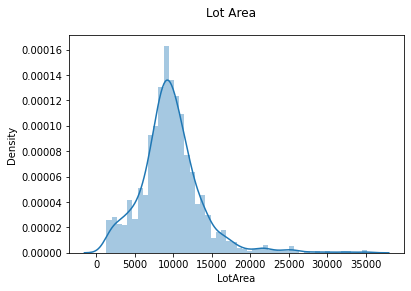

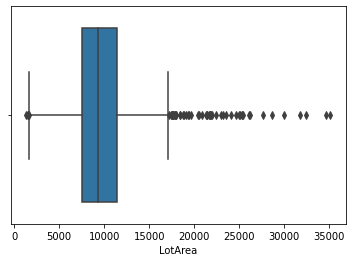

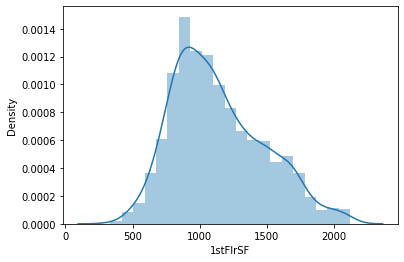

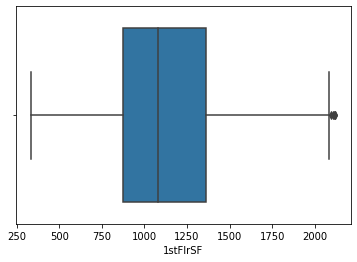

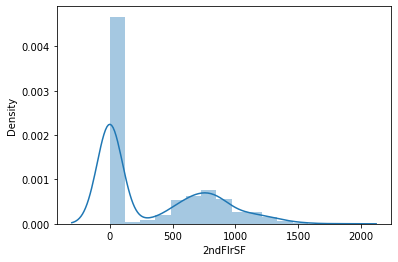

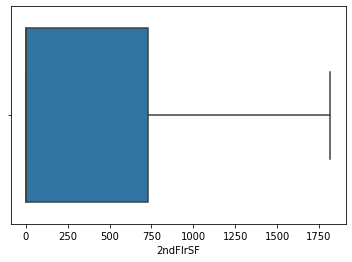

In [53]:
# Vẽ đồ thị gồm 2 phần: histogram và boxplot của biến.
lot_area = df['LotArea']
first_flr_sf = df['1stFlrSF']
second_flr_sf = df['2ndFlrSF']

fig, ax = plt.subplots()
# Lot Area
fig.suptitle('Lot Area')
sns.distplot(lot_area)
plt.show()
sns.boxplot(lot_area)
plt.show()

# 1st Flr SF
fig.suptitle('1st Flr SF')
sns.distplot(first_flr_sf)
plt.show()
sns.boxplot(first_flr_sf)
plt.show()

# 2nd Flr SF
fig.suptitle('2nd Flr SF')
sns.distplot(second_flr_sf)
plt.show()
sns.boxplot(second_flr_sf)
plt.show()

### 2.2. Với mỗi biến categorical hãy thực hiện các yêu cầu sau:
- Sử dụng groupby, count để đếm số các giá trị phân biệt có trong biến
- Vẽ đồ thị dạng bar plot với các dữ liệu nhận được. Nhận xét. 

#### Categorical Variables
- FullBath
- BedroomAbvGr
- TotRmsAbvGrd

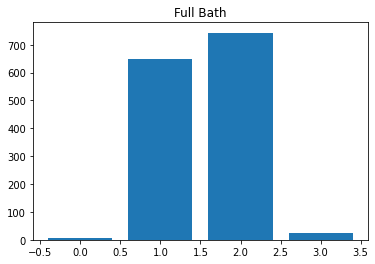

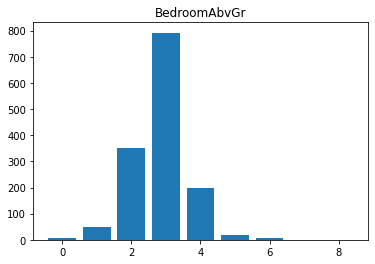

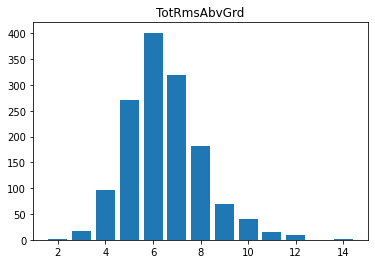

Nhận xét: các giá trị ở khu vực giữa thường có số lượng cao nhất, biểu đồ TotRmsAbvGrd có dạng phân bố chuẩn


In [54]:
full_bath = df['FullBath']
bedroom_abv_gr = df['BedroomAbvGr']
tot_rms_abv_grd = df['TotRmsAbvGrd']

count_category_full_bath = df.groupby(['FullBath'])['FullBath'].count()
# print(count_category_full_bath)

count_category_bedroom_abv_gr = df.groupby(['BedroomAbvGr'])['BedroomAbvGr'].count()
# print('count_category_bedroom_abv_gr', count_category_bedroom_abv_gr)

count_category_tot_rms_abv_grd = df.groupby(['TotRmsAbvGrd'])['TotRmsAbvGrd'].count()
# print('count_category_tot_rms_abv_grd', count_category_tot_rms_abv_grd)

plt.title('Full Bath')
plt.bar(count_category_full_bath.index, count_category_full_bath)
plt.show()

plt.title('BedroomAbvGr')
plt.bar(count_category_bedroom_abv_gr.index, count_category_bedroom_abv_gr)
plt.show()

plt.title('TotRmsAbvGrd')
plt.bar(count_category_tot_rms_abv_grd.index, count_category_tot_rms_abv_grd)
plt.show()

print('Nhận xét: các giá trị ở khu vực giữa thường có số lượng cao nhất, biểu đồ TotRmsAbvGrd có dạng phân bố chuẩn')

## 3. Phân tích hai biến
### Continuous & Continous
- Sử dụng pairplot để vẽ dữ liệu có trong 3 biến ['LotArea', '1stFlrSF', '2ndFlrSF]
- Sử dụng hàm corr để tính độ tương quan của 3 biến này.
- Nhận xét mối liên hệ giữa các biến

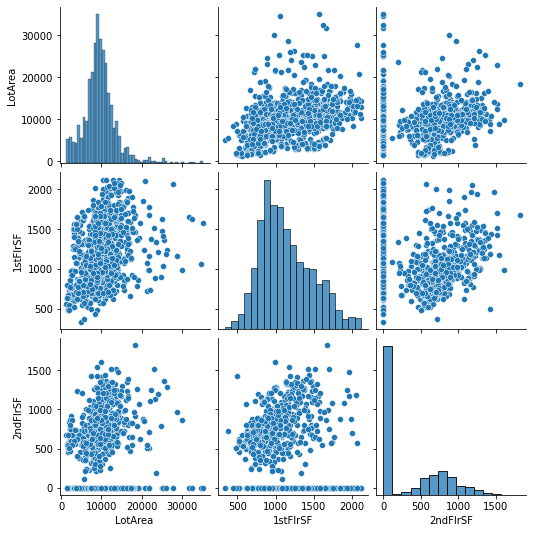

In [55]:
# Sử dụng pairplot để vẽ dữ liệu có trong 3 biến 'LotArea', '1stFlrSF', '2ndFlrSF
pair_plot_data = df[['LotArea', '1stFlrSF', '2ndFlrSF']]
sns.pairplot(pair_plot_data)

In [56]:
# Sử dụng hàm corr để tính độ tương quan của 3 biến này.
pair_plot_data.corr()

# Nhận xét mối liên hệ giữa các biến
print('Nhận xét 1: LotArea và 1stFlrSF có tương quan thuận và mạnh hơn LotArea với 2ndFlrSF, nghĩa là LotArea tăng thì 1stFlrSF và 2ndFlrSF cũng có xu  hướng  tăng\n')
print('Nhận xét 2: 1stFlrSF có tương quan nghịch với 2ndFlrSF, nghĩa là khi 1stFlrSF thì 2ndFlrSF có xu hướng giảm\n')

Nhận xét 1: LotArea và 1stFlrSF có tương quan thuận và mạnh hơn LotArea với 2ndFlrSF, nghĩa là LotArea tăng thì 1stFlrSF và 2ndFlrSF cũng có xu  hướng  tăng

Nhận xét 2: 1stFlrSF có tương quan nghịch với 2ndFlrSF, nghĩa là khi 1stFlrSF thì 2ndFlrSF có xu hướng giảm



### Categorical & Categorical
- 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd'
- Dùng Chi-square test để kiểm tra độ tương qua giữa các cặp biến: FullBath' và 'BedroomAbvGr', ...  .

In [57]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency

FullBath_BedroomAbvGr = pd.crosstab(df['FullBath'], df['BedroomAbvGr'])
BedroomAbvGr_TotRmsAbvGrd = pd.crosstab(df['BedroomAbvGr'], df['TotRmsAbvGrd'])
FullBath_TotRmsAbvGrd = pd.crosstab(df['FullBath'], df['TotRmsAbvGrd'])

######################################################################
stat, prob, dof, expected = chi2_contingency(FullBath_BedroomAbvGr)
critical = chi2.ppf(prob, dof)

print('Sự tương quan FullBath và BedroomAbvGr là: ')
print('dof', dof)
print('expected', expected)
print('prob', prob)
print('critical', critical)

if abs(stat) >= critical:
    print('Phụ thuộc')
else:
    print('Không phụ thuộc')

alpha  = 1 - prob
if (prob <= alpha):
    print('Phụ thuộc')
else:
    print('Không phụ thuộc\n')

######################################################################
stat, prob, dof, expected = chi2_contingency(BedroomAbvGr_TotRmsAbvGrd)
critical = chi2.ppf(prob, dof)

print('Sự tương quan BedroomAbvGr và TotRmsAbvGrd là: ')
print('dof', dof)
print('expected', expected)
print('prob', prob)
print('critical', critical)

if abs(stat) >= critical:
    print('Phụ thuộc')
else:
    print('Không phụ thuộc')

alpha  = 1 - prob
if (prob <= alpha):
    print('Phụ thuộc')
else:
    print('Không phụ thuộc\n')

######################################################################
stat, prob, dof, expected = chi2_contingency(FullBath_TotRmsAbvGrd)
critical = chi2.ppf(prob, dof)

print('Sự tương quan FullBath và TotRmsAbvGrd là: ')
print('dof', dof)
print('expected', expected)
print('prob', prob)
print('critical', critical)

if abs(stat) >= critical:
    print('Phụ thuộc')
else:
    print('Không phụ thuộc')

alpha  = 1 - prob
if (prob <= alpha):
    print('Phụ thuộc')
else:
    print('Không phụ thuộc\n')

Sự tương quan FullBath và BedroomAbvGr là: 
dof 21
expected [[2.81096275e-02 2.75474350e-01 1.96767393e+00 4.45256500e+00
  1.11876318e+00 1.12438510e-01 3.93534786e-02 5.62192551e-03]
 [2.27336613e+00 2.22789881e+01 1.59135629e+02 3.60101195e+02
  9.04799719e+01 9.09346451e+00 3.18271258e+00 4.54673226e-01]
 [2.61068166e+00 2.55846803e+01 1.82747716e+02 4.13531975e+02
  1.03905130e+02 1.04427266e+01 3.65495432e+00 5.22136332e-01]
 [8.78425861e-02 8.60857344e-01 6.14898103e+00 1.39142656e+01
  3.49613493e+00 3.51370344e-01 1.22979621e-01 1.75685172e-02]]
prob 1.939210497006433e-148
critical 8.07317493615978e-14
Phụ thuộc
Phụ thuộc
Sự tương quan BedroomAbvGr và TotRmsAbvGrd là: 
dof 77
expected [[3.51370344e-03 5.97329585e-02 3.40829234e-01 9.52213633e-01
  1.40899508e+00 1.12438510e+00 6.35980323e-01 2.42445538e-01
  1.40548138e-01 5.62192551e-02 3.16233310e-02 3.51370344e-03]
 [3.44342937e-02 5.85382994e-01 3.34012649e+00 9.33169361e+00
  1.38081518e+01 1.10189740e+01 6.23260717e+00 2

### Categorical & Continuous
- Có quan hệ giữa 'FullBath' và 'LotArea'? ('FullBath' có bị ảnh hưởng bởi'LotArea'?).
- Dùng biểu đồ boxplot của Seaborn để vẽ biểu đồ giữa 2 biến (x="FullBath", y="LotArea") 
- Dùng ANOVA one way.
- Dùng Tukey HSD nhận xét về mối quan hệ (nếu có).

<AxesSubplot:xlabel='FullBath', ylabel='LotArea'>

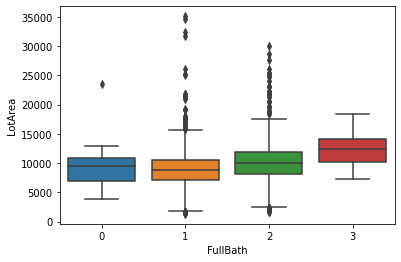

In [58]:
# Dùng biểu đồ boxplot của Seaborn để vẽ biểu đồ giữa 2 biến (x="FullBath", y="LotArea")
sns.boxplot(x=df['FullBath'], y=df['LotArea'])

In [59]:
# Dùng ANOVA one way.
full_bath_lot_area = df.groupby(['FullBath'])['LotArea'].count()
full_bath_lot_area
fvalue, pvalue = scipy.stats.f_oneway(full_bath_lot_area.index, full_bath_lot_area.values)
print(fvalue, pvalue)

3.2376968511872484 0.12206053721819453


In [67]:
# Dùng Tukey HSD nhận xét về mối quan hệ (nếu có)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

data_melt = pd.melt(df, id_vars=['FullBath'], value_vars=['LotArea'])
multiple_comparison = pairwise_tukeyhsd(endog=data_melt['value'], groups=data_melt['FullBath'], alpha=0.05)
print(multiple_comparison)
print('Nhận xét: Dựa vào kết quả Tukey HSD cho thấy các groupu [0, 1] [0, 2] và [0, 3] là chấp nhận  null hypothesis còn lại là bác bỏ')

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
     0      1 -1460.7264 0.7075 -5111.0597 2189.6068  False
     0      2  -345.3755    0.9 -3992.8274 3302.0763  False
     0      3     2156.8 0.5383 -2011.4233 6325.0233  False
     1      2  1115.3509  0.001    563.566 1667.1359   True
     1      3  3617.5264  0.001  1525.9608  5709.092   True
     2      3  2502.1755 0.0112   415.6428 4588.7082   True
-----------------------------------------------------------
Nhận xét: Dựa vào kết quả Tukey HSD cho thấy các groupu [0, 1] [0, 2] và [0, 3] là chấp nhận  null hypothesis còn lại là bác bỏ


## 4. Xử lý dữ liệu thiếu
- Kiểm tra xem có cột nào chứa dữ liệu null không